In [32]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np # numpy는 배열 사용할 때
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(512, 512, 3)


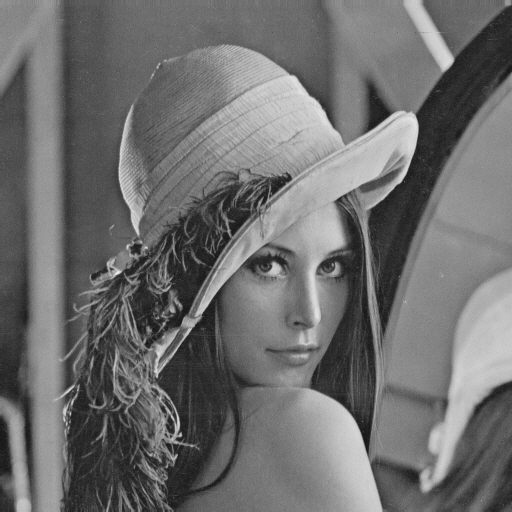

In [33]:
img = cv2.imread('/content/gdrive/My Drive/Ch01/IP/Images/lena.jpg')
print(img.shape)
gImg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# plt.imshow(gImg1, cmap='gray')
cv2_imshow(gImg1)

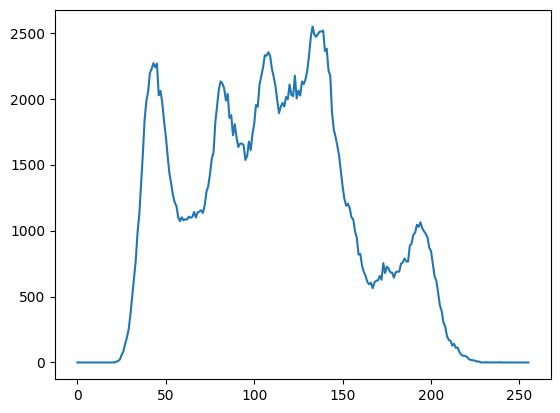

In [54]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0, 255])
plt.plot(hist)

(360, 360, 3)


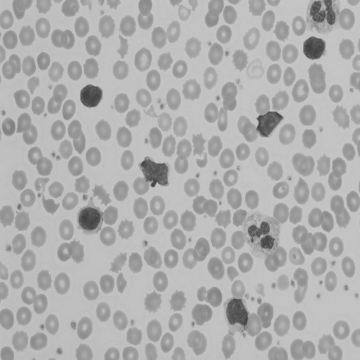

In [35]:
img = cv2.imread('/content/gdrive/My Drive/Ch01/IP/Images/cell.bmp')
print(img.shape)
gImg2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# plt.imshow(gImg1, cmap='gray')
cv2_imshow(gImg2)

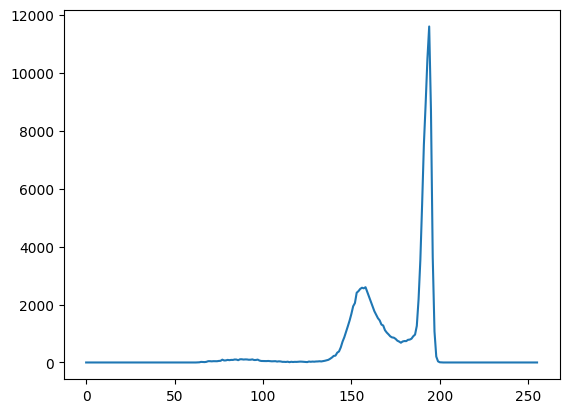

In [55]:
hist = cv2.calcHist([gImg2], [0], None, [256], [0, 255])
plt.plot(hist)

(256, 256, 3)


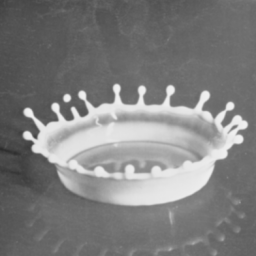

In [37]:
img = cv2.imread('/content/gdrive/My Drive/Ch01/IP/Images/milkdrop.bmp')
print(img.shape)
gImg3 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# plt.imshow(gImg1, cmap='gray')
cv2_imshow(gImg3)

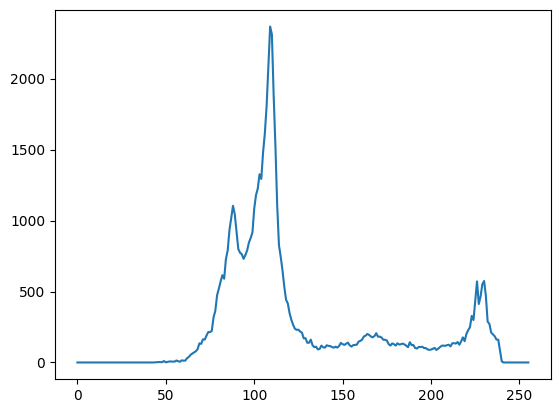

In [56]:
hist = cv2.calcHist([gImg3], [0], None, [256], [0, 255])
plt.plot(hist)

(360, 360, 3)


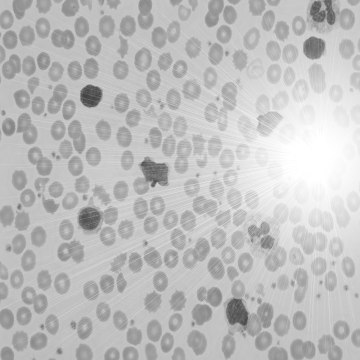

In [65]:
img = cv2.imread('/content/gdrive/My Drive/Ch01/IP/Images/cell-bright.bmp')
print(img.shape)
gImg4 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# plt.imshow(gImg1, cmap='gray')
cv2_imshow(gImg4)

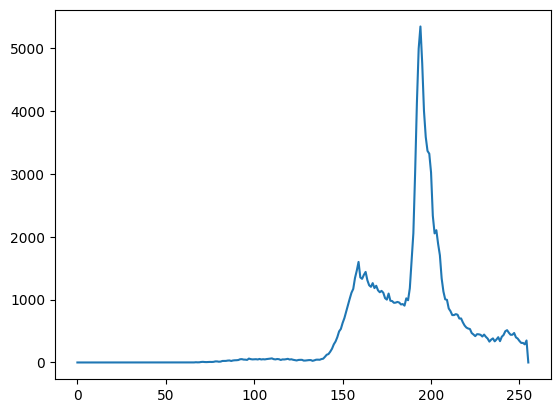

In [66]:
hist = cv2.calcHist([gImg4], [0], None, [256], [0, 255])
plt.plot(hist)

In [94]:
gBin = np.zeros((gImg3.shape[0], gImg3.shape[1]), dtype = np.ubyte)

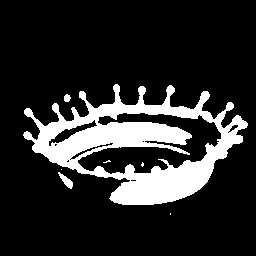

In [95]:
Threshold = 180
for h in range(gImg3.shape[0]):
  for w in range(gImg3.shape[1]):
    if gImg3[h ,w] > Threshold:
      gBin[h, w] = 255
    else:
      gBin[h, w] = 0

cv2_imshow(gBin)

In [100]:
T1 = 150
T2 = 0
T0 = 1

In [101]:
def threshold_update(img, bImg):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(gImg3.shape[0]):
   for w in range(gImg3.shape[1]):
    if(bImg[h, w] == 0):
      sum1 += np.int32(sum1 + img[h, w])
      count1 += 1
    else:
      sum2 += np.int32(sum2 + img[h, w])
      count2 += 1

  avg1 = sum1 / count1
  avg2 = sum2 / count2

  T = (avg1 + avg2) / 2

  return T

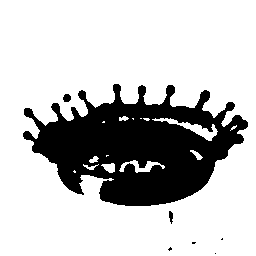

In [102]:
for h in range(gImg3.shape[0]):
  for w in range(gImg3.shape[1]):
    if gImg3[h, w] > T1:
      gBin[h, w] = 0
    else:
      gBin[h, w] = 255

cv2_imshow(gBin)

1081714.3800994826


/tmp/ipython-input-1120710325.py:10: RuntimeWarning: overflow encountered in scalar add
  sum1 += np.int32(sum1 + img[h, w])
/tmp/ipython-input-1120710325.py:13: RuntimeWarning: overflow encountered in scalar add
  sum2 += np.int32(sum2 + img[h, w])


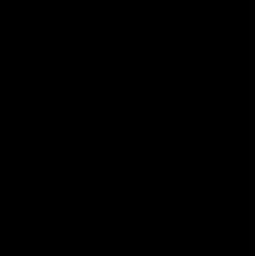

In [104]:
while True:
  T2 = threshold_update(gImg3, gBin)

  if(np.abs(T1 - T2) < T0):
    break
  else:
    T1 = T2
    for h in range(gImg3.shape[0]):
      for w in range(gImg3.shape[1]):
       if gImg3[h ,w] > T1:
        gBin[h, w] = 0
      else:
        gBin[h, w] = 255

print(T2)
cv2_imshow(gBin)